In [11]:
import pandas as pd
import numpy as np
from  sklearn.linear_model import LinearRegression

In [34]:
N = 100
x_1 = np.random.normal(loc=0, scale=1, size=N)
x_2 = np.random.normal(loc=5, scale=1, size=N)

beta_2 = 1

y_train = x_1 + beta_2*x_2 + np.random.normal(scale=0.01)

df_train = pd.DataFrame(data = {'y': y_train,
                                'x_1': x_1,
                                'x_2': x_2})

<Axes: xlabel='x_1', ylabel='y'>

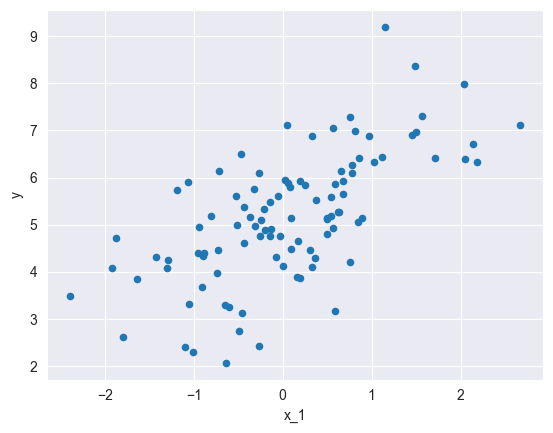

In [35]:
df_train.plot.scatter('x_1', 'y')

<Axes: xlabel='x_2', ylabel='y'>

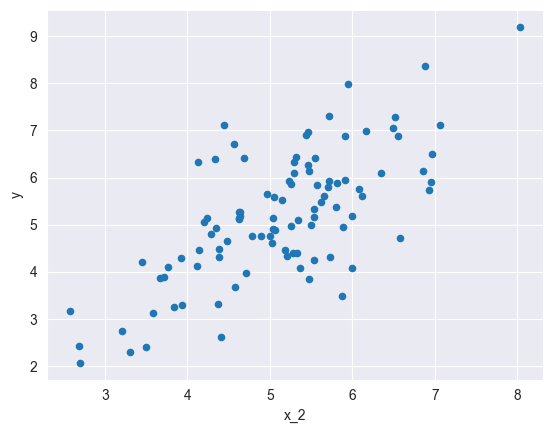

In [36]:
df_train.plot.scatter('x_2', 'y')

In [37]:
lr = LinearRegression()
lr.fit(df_train[['x_1', 'x_2']], df_train['y'])

LinearRegression()

In [38]:
beta_hat_1, beta_hat_2 = lr.coef_[:]

In [39]:
df_train['prediction'] = df_train['x_1']*beta_hat_1 + df_train['x_2']*beta_hat_2
df_train['loss'] = (df_train['prediction'] - df_train['y'])**2

In [40]:
df_train['y_oos'] = df_train['x_1']

In [41]:
df_train['loss_oos'] = (df_train['prediction'] - df_train['y_oos'])**2

In [42]:
df_train['stomped_prediction'] = beta_hat_1*df_train['x_1'] + df_train['x_2'].mean()*beta_hat_2

In [43]:
df_train['stomped_loss_oos'] =  (df_train['stomped_prediction'] - df_train['y_oos'])**2

In [44]:
np.sqrt(df_train[['loss', 'loss_oos', 'stomped_loss_oos']].mean())

loss                0.010522
loss_oos            5.216555
stomped_loss_oos    5.114276
dtype: float64